In [1]:
import numpy as np
import pandas as pd
import json

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'

In [2]:
def read_file(path):
    return pd.io.json.read_json(get_path(path))


get_path = lambda path: f'./mapped/{path}.json'
files = ["book", "patron", "rent"]
dfs = dict(zip(files, map(read_file, files)))

## Book that store in 1 library but rented a lot in another library

In [3]:
rent_by_title_library = dfs['rent'].groupby(['title', 'library']).size().sort_values(ascending=False)
rent_by_title_library.name = 'rent_count'

In [4]:
book_by_title_library = dfs['book'].groupby(['title', 'library']).size().sort_values(ascending=False)
book_by_title_library.name = 'book_count'

In [5]:
tl = (pd.concat([rent_by_title_library, book_by_title_library], axis=1)
        .dropna()
    )
print(tl.shape)

(127716, 2)


In [6]:
book_multiple_library = tl[tl.index.get_level_values(0).duplicated(keep=False)].sort_index(level=[0])
book_multiple_library

rent_count  \
title                                              library                                             
"Good coup" gone bad : Thailand's political dev... Arts Library                                  3.0   
                                                   Political Science Library                     5.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                     6.0   
                                                   Thailand and ASEAN Information Center         1.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library                               7.0   
...                                                                                              ...   
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                             1.0   
ไฮดี้ = Heidi                                      Arts Library                                  1.0   
                                                   Central Library                               5.0   
ไฮเทคาถาปาฏิหาริย์ ว่าด้วยวิทยาศาสตร์และเทคโนโล... Central Library                               2.0   
                                                   Thailand and ASEAN Information Center         1.0   

                                                                                          book_count  
title                                              library                                            
"Good coup" gone bad : Thailand's political dev... Arts Library                                  3.0  
                                                   Political Science Library                     5.0  
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                    15.0  
                                                   Thailand and ASEAN Information Center         2.0  
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library                              10.0  
...                                                                                              ...  
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                             3.0  
ไฮดี้ = Heidi                                      Arts Library                                 19.0  
                                                   Central Library                              17.0  
ไฮเทคาถาปาฏิหาริย์ ว่าด้วยวิทยาศาสตร์และเทคโนโล... Central Library                              10.0  
                                                   Thailand and ASEAN Information Center         2.0  

[32624 rows x 2 columns]

In [7]:
book_multiple_library['ratio'] = book_multiple_library['rent_count'] / book_multiple_library['book_count']

In [8]:
high_rent_sort = book_multiple_library[book_multiple_library['ratio'] >= 1].sort_values('rent_count', ascending=False)
high_rent_sort.head()

,,rent_count,book_count,ratio
title,library,,,
ใต้เงาอสูร,Central Library,40.0,40.0,1.0
การต่างประเทศไทยในยุคสงครามเย็น,Political Science Library,30.0,30.0,1.0
ทฤษฎีการเมืองกับความสัมพันธ์ระหว่างประเทศ,Political Science Library,25.0,25.0,1.0
การบริหารงานคลังรัฐบาล,Central Library,24.0,24.0,1.0
เคมี = Chemistry,Science Library,19.0,19.0,1.0


In [9]:
button = widgets.Button(description="Next")
output = widgets.Output()

display(button, output)
index = 0

def on_button_clicked(b):
    with output:
        title = high_rent_sort.iloc[index].name[0]
        book_multiple_library.loc[title]
        display(title)
        display(book_multiple_library.loc[title])
        
def clicked(b):
    global index
    index += 1
    output.clear_output()
    display(button)
    on_button_clicked(b)

button.on_click(clicked)

Button(description='Next', style=ButtonStyle())

Output()

In [17]:
def compare(ser):
    book = ser['book_count'].values
    ratio = ser['ratio'].values
    rent = ser['rent_count'].values
    idx_min = np.argmin(ratio)
    idx_max = np.argmax(ratio)
#     print(book[idx_max], book[idx_min])
    unbalance = book[idx_max] < book[idx_min] and rent[idx_max] > rent[idx_min]
    morethan = book.sum() > 100
#     equal = abs(book.max() - book.min()) < 5
    return unbalance and morethan 
    
unbalance = book_multiple_library.iloc[:].groupby(level=0).filter(compare)
print(unbalance.shape)
unbalance.head()

(112, 3)


rent_count  \
title                                              library                         
Atlas of human anatomy                             Central Library           3.0   
                                                   Dentistry Library         1.0   
                                                   Medicine Library         10.0   
Color atlas of anatomy : a photographic study o... Dentistry Library         1.0   
                                                   Medicine Library         13.0   

                                                                      book_count  \
title                                              library                         
Atlas of human anatomy                             Central Library           8.0   
                                                   Dentistry Library        25.0   
                                                   Medicine Library         80.0   
Color atlas of anatomy : a photographic study o... Dentistry Library        15.0   
                                                   Medicine Library        125.0   

                                                                         ratio  
title                                              library                      
Atlas of human anatomy                             Central Library    0.375000  
                                                   Dentistry Library  0.040000  
                                                   Medicine Library   0.125000  
Color atlas of anatomy : a photographic study o... Dentistry Library  0.066667  
                                                   Medicine Library   0.104000

In [18]:
%matplotlib inline

titles = unbalance.index.get_level_values(0).unique()
button = widgets.Button(description="Next")
output = widgets.Output()

display(button, output)
index = 0

def on_button_clicked(b):
    with output:
        title = titles[index]
        x = unbalance.loc[title].index
        d = unbalance.loc[title].values
        fig, axs = plt.subplots(1, 3)
        extent = [d.min(), d.max() * 1.25]
        axs[0].bar(x=x, 
                   height=d[:,0],
                   )
        axs[0].set_title('rent_count')
        axs[0].set_ylim(*extent)

        axs[1].bar(x=x, 
                   height=d[:,1])
        axs[1].set_title('book_count')
        axs[1].set_ylim(*extent)
        
        axs[2].bar(x=x,
                  height=d[:, 2])
        axs[2].set_title('ratio')
        axs[2].set_ylim(0, 1)
        
        fig.suptitle(title)
        fig.set_size_inches(12, 5)
        display(fig)

        
def clicked(b):
    global index
    index += 1
    output.clear_output()
    on_button_clicked(b)
#     display(button, output)


button.on_click(clicked)

Button(description='Next', style=ButtonStyle())

Output()

In [15]:
rent_df = dfs['rent']
rent_df[rent_df['title'] == 'Atlas of human anatomy']

,id,faculty,library,title,day,month,year,period
60890,60890,Medicine,Medicine Library,Atlas of human anatomy,Fri,6,2012,evening
171562,171562,Others,Central Library,Atlas of human anatomy,Sat,6,2011,afternoon
194721,194721,Dentistry,Dentistry Library,Atlas of human anatomy,Tue,10,2019,evening
196934,196934,Medicine,Medicine Library,Atlas of human anatomy,Thu,6,2013,afternoon
197958,197958,Medicine,Central Library,Atlas of human anatomy,Tue,7,2020,afternoon
197959,197959,Medicine,Central Library,Atlas of human anatomy,Mon,8,2020,afternoon
198096,198096,Medicine,Medicine Library,Atlas of human anatomy,Sun,7,2019,evening
198427,198427,Medicine,Medicine Library,Atlas of human anatomy,Wed,6,2020,morning
198629,198629,Medicine,Medicine Library,Atlas of human anatomy,Thu,6,2019,evening
198630,198630,Medicine,Medicine Library,Atlas of human anatomy,Thu,7,2019,morning


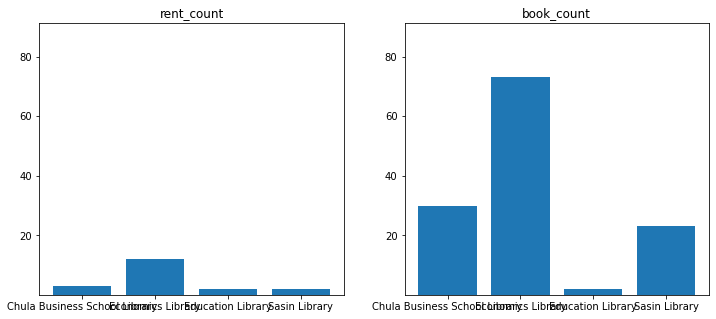

In [259]:
title = titles[1]
x = book_multiple_library.loc[title].index
d = book_multiple_library.loc[title].values
fig, axs = plt.subplots(1, 2)
extent = [d.min(), d.max() * 1.25]
axs[0].bar(x=x, 
           height=d[:,0],
           )
axs[0].set_title('rent_count')
axs[0].set_ylim(*extent)

axs[1].bar(x=x, 
           height=d[:,1])
axs[1].set_title('book_count')
axs[1].set_ylim(*extent)
fig.set_size_inches(12, 5)
